In [1]:
import numpy, math
from matplotlib import pyplot as plt
from matplotlib import patches
from src import code_toggle
%matplotlib inline

# Warm-up exercises

FIXME



# Challenge

FIXME

# Integration

## How can we calculate the area under a curve?

Consider the graph of 

$$y=x^2$$

Suppose we want to find the area under the curve from $x=1$ to $x=2$.

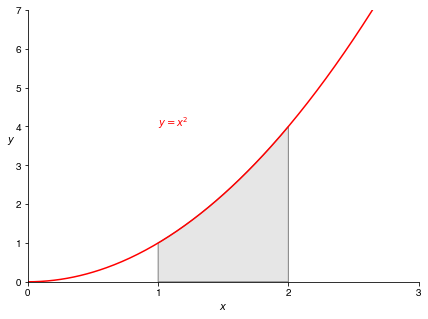

In [9]:
from matplotlib.patches import Polygon

x = numpy.linspace(0, 3, 300)

# plt.xkcd()
fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(7,5))

axis.set_xlim([0,3])
axis.set_xticks(numpy.arange(0,4))
axis.set_xlabel('$x$')
axis.set_ylim([0,7])
axis.set_ylabel('$y$',rotation=0)
axis.spines['left'].set_position('zero')
axis.spines['right'].set_color('none')
axis.spines['bottom'].set_position('zero')
axis.spines['top'].set_color('none')

def func(x):
    return(x**2)

a=1
b=2
ix=numpy.linspace(a,b)
iy=func(ix)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
axis.add_patch(poly)

y = x**2
axis.annotate('$y=x^2$',xy=(1,4),c='r')
axis.plot(x, y,'r-')
plt.show()

code_toggle()

We could divide the area into strips, calculate the area of each strip and sum these areas together

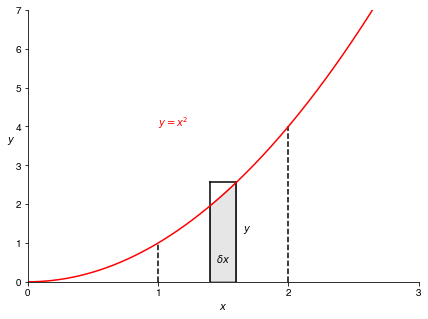

In [31]:
from matplotlib.patches import Polygon

x = numpy.linspace(0, 3, 300)

# plt.xkcd()
fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(7,5))

axis.set_xlim([0,3])
axis.set_xticks(numpy.arange(0,4))
axis.set_xlabel('$x$')
axis.set_ylim([0,7])
axis.set_ylabel('$y$',rotation=0)
axis.spines['left'].set_position('zero')
axis.spines['right'].set_color('none')
axis.spines['bottom'].set_position('zero')
axis.spines['top'].set_color('none')

def func(x):
    return(x**2)


a=1.4
b=1.6
ix=numpy.linspace(a,b)
iy=func(ix)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
axis.add_patch(poly)

axis.plot((1,1),(0,1),'k--')
axis.plot((2,2),(0,4),'k--')

axis.plot((1.4,1.4),(0,2.56),'k-')
axis.plot((1.6,1.6),(0,2.56),'k-')
axis.plot((1.4,1.6),(2.56,2.56),'k-')
axis.annotate('$\delta x$',xy=(1.5,0.5),ha='center',color='black')
axis.annotate('$y$',xy=(1.65,1.3),ha='left',color='black')

y = x**2
axis.annotate('$y=x^2$',xy=(1,4),c='r')
axis.plot(x, y,'r-')
plt.show()

code_toggle()

The area of the small shaded strip drawn on the graph above is $\delta A$ (since it is small and finite) and 

$$ \delta A \approx y. \delta x $$

But this is clearly an overestimate (if the curve had $\frac{dy}{dx} < 0$ then it would be an underestimate)

However we can imagine splitting up the region betwen $x=1$ and $x=2$ into lots of small strips, calculating their areas and adding them up (summing them)


$$ \text{total area (A)} \approx \sum_{x=1}^{x=2} y.\delta x$$

where the capital Greek sigma ($\Sigma$) is used since it is short for 'sum'. Consider our first equation and re-arrange it to make y the subject

$$ y \approx \frac{\delta A}{\delta x} $$

Just like when we were trying to calculate the slope of a function, as we make $\delta x$ smaller and smaller, this becomes more and more accurate. If we let $\delta x$ become infinitely small then it will be exact i.e.

$$ y = \lim_{\delta x \rightarrow 0} \frac{\delta A}{\delta x} $$

Notice how we now have an equality (rather than an approximately equals sign: $\approx$)

This can be written in Leibnizian form as 

$$ y = \frac{dA}{dx} $$

where just like before the RHS is a single term (it is the differential of $A$ with respect to $x$) and CANNOT be simplified.

Hence we can write

\begin{align*}
A &= \lim_{\delta x \rightarrow 0} \sum_{x=1}^{x=2} \delta A\\
 &= \lim_{\delta x \rightarrow 0} \sum_{x=1}^{x=2}  y. \delta x\\
\end{align*}

At this point we get tired of writing the limit symbol and then the summation symbol and so invent a new one; the long s was chosen by Leibniz since this is an infinite sum. 

\begin{align*}
A &= \int_{x=1}^{x=2} dA\\
&= \int_{x=1}^{x=2} y.dx\\
\end{align*}

Over time the long s has been lost from English but lives on as part of the sharp s in German. It means "sum over"

Fine. We've got some fancy new notation. How do we DO integration? 

We said that:

\begin{align*}
A &= \int_{x_1}^{x_2} dA \\
 &= \int_{x1}^{x2} y.dx
\end{align*}

but we also showed that $y = \frac{dA}{dx}$, therefore

$$\boxed{ A = \int_{x_1}^{x_2} \frac{dA}{dx}. dx }$$

So INTEGRATION reverses the process of DIFFERENTIATION. It is the inverse mathematical operation.

### Example 1

We know that 

$$\frac{d}{dx}(x^2) = 2x $$ 

so 

$$ \left [ x^2 \right ]_{x_1}^{x_2} - \int_{x_1}^{x_2} 2x. dx $$

where the square brackets around our function mean "the area of the function (here $x^2$) between the values $x=1$ and $x=2$". The more positive number is always the top one.


### Example 2

Likewise

$$\frac{d}{dx}\left (\frac{1}{3} x^3 \right ) = x^2 $$ 
so 

\begin{align*}
\int_{x=1}^{x=2} 2x. dx &= \left [ \frac{1}{3} x^3 \right ]_{x=1}^{x=2}\\
&= \frac{8}{3} - \frac{1}{3}\\
&= \frac{7}{3} 
\end{align*}


### Integrating polynomials

Since we already know that 

$$ \frac{d}{dx} (ax^{n+1}) = a(n+1)x^n $$

where $a$ and $n$ are constants (just numbers). (I've just written it with a power of $(n+1)$ rather than $n$ as we normally do, but you can check it is correct). Then we can infer that

$$ \boxed{ \int_{x_1}^{x_2} ax^n.dx = \left [ \frac{a}{(n+1)}x^{n+1} \right ]_{x_1}^{x_2} }$$

EXCEPT when $n=-1$

### Example 3

$$ \int_{x_1}^{x_2} x^6. dx = \left [ \frac{1}{7} x^7 \right ]_{x_1}^{x_2}$$

Because integration is the INVERSE of differentiation we can ALWAYS CHECK our answer by differentiating it!

\begin{align*}
\frac{d}{dx}\left (\frac{1}{7}x^7 \right ) &= \frac{7}{7}x^6\\
&= x^6
\end{align*}

Yes, our answer is correct

### Example 4

\begin{align*} 
\int_{x_1}^{x_2} x^{3/2}. dx &= \left [ \frac{1}{5/2} x^{5/2} \right ]_{x_1}^{x_2}\\
&= \left [ \frac{2}{5} x^{5/2} \right ]_{x_1}^{x_2}
\end{align*}

Differentiating to check ...

\begin{align*}
\frac{d}{dx}\left ( \frac{2}{5} x^{5/2} \right ) &= \frac{2}{5}. \frac{5}{2}x^{3/2}\\
&= x^{3/2} 
\end{align*}

Yes, our answer is correct

### Example 5

\begin{align*} 
\int_{x_1}^{x_2} \frac{1}{\sqrt{x}}. dx &= \left [ \frac{1}{1/2} x^{1/2} \right ]_{x_1}^{x_2}\\
&= \left [ 2 x^{1/2} \right ]_{x_1}^{x_2}\\
&= \left [ 2 \sqrt{x} \right ]_{x_1}^{x_2}
\end{align*}

Differentiating to check ...

\begin{align*}
\frac{d}{dx}\left ( 2 x^{1/2} \right ) &= 2. \frac{1}{2}x^{-1/2}\\
&= x^{-1/2}\\
&= \frac{1}{\sqrt{x}}
\end{align*}

Yes, our answer is correct

<div class="alert alert-block alert-danger">
<img src="images/curtis.jpg" width=50 title="Curtis is not happy" style="vertical-align:top"/>
<b>Common misconception:</b> It is very easy to get $x_1$ and $x_2$ the wrong way round. 
</div>

$x_1$ and $x_2$ are called the LIMITS of the integration (in our motiviating example the limits were 1 and 2). Both of these are correct;

\begin{align*}
\int^b_a f'(x).dx &= \left [ f(x) \right ]^b_a\\
&= f(b)-f(a)
\end{align*}

\begin{align*}
\int^a_b f'(x).dx &= \left [ f(x) \right ]^a_b\\
&= f(a)-f(b)
\end{align*}

Notice how it is always the top limit minus the bottom limit.
